In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
PW = 8
PH = 6
plt.rcParams['figure.figsize'] = (PW, PH) 
plt.rcParams['image.cmap'] = 'gray'

import re
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.options.display.max_rows = 250
pd.options.display.max_columns = 500
pd.options.display.max_colwidth = 500

from nltk.tokenize import RegexpTokenizer
import string 
import warnings

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("./"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'mbti_1.csv', 'PT.ipynb']


In [123]:
df = pd.read_csv("./mbti_1.csv", encoding="utf-8")
print("Number of users", len(df))

Number of users 8675


## Explore

In [124]:
df.head(3)

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments https://www.youtube.com/watch?v=iz7lE1g4XM4 sportscenter not top ten plays https://www.youtube.com/watch?v=uCdfze1etec pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8 http://www.youtube.com/watch?v=u8ejam5DP3E On repeat for most of today.|||May the PerC Experience immerse you.|||The last ...
1,ENTP,'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin* That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This...
2,INTP,"'Good one _____ https://www.youtube.com/watch?v=fHiGbolFFGw|||Of course, to which I say I know; that's my blessing and my curse.|||Does being absolutely positive that you and your best friend could be an amazing couple count? If so, than yes. Or it's more I could be madly in love in case I reconciled my feelings (which at...|||No, I didn't; thank you for a link!|||So-called Ti-Si loop (and it can stem from any current topic/obsession) can be deadly. It's like when you're stuck in your o..."


In [125]:
#Personality Types
groups = df.groupby("type").count()
groups.sort_values("posts", ascending=False, inplace=True)
print ("Personality types", groups.index.values)

#Priors used below
priors = groups["posts"] / groups["posts"].sum()

Personality types ['INFP' 'INFJ' 'INTP' 'INTJ' 'ENTP' 'ENFP' 'ISTP' 'ISFP' 'ENTJ' 'ISTJ'
 'ENFJ' 'ISFJ' 'ESTP' 'ESFP' 'ESFJ' 'ESTJ']


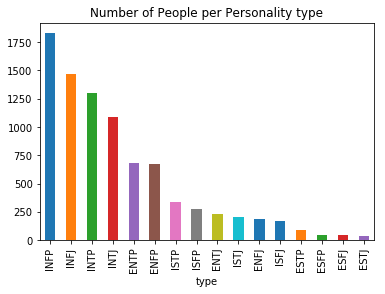

In [126]:
groups["posts"].plot(kind="bar", title="Number of People per Personality type");

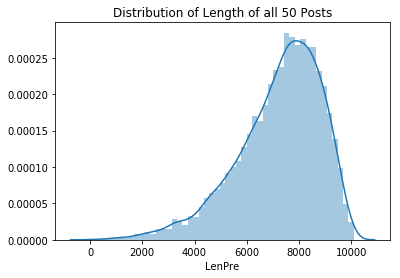

In [127]:
df["LenPre"] = df["posts"].apply(len)
sns.distplot(df["LenPre"]).set_title("Distribution of Length of all 50 Posts");

In [128]:
def preprocess_text(df, remove_special=True):
    #Remove links 
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'https?:\/\/.*?[\s+]', '', x.replace("|"," ") + " "))
    
    #Strip Punctation
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^\w\s]','',x))

    #Remove Non-words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))

    #To lower
    df["posts"] = df["posts"].apply(lambda x: x.lower())

    #Remove multiple letter repating words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'([a-z])\1{2,}[\s|\w]*','',x)) 

    #Remove short/long words
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{0,3})?\b','',x)) 
    df["posts"] = df["posts"].apply(lambda x: re.sub(r'(\b\w{30,1000})?\b','',x))

    #Remove Personality Types Words
    if remove_special:
        pers_types = ['INFP' ,'INFJ', 'INTP', 'INTJ', 'ENTP', 'ENFP', 'ISTP' ,'ISFP' ,'ENTJ', 'ISTJ','ENFJ', 'ISFJ' ,'ESTP', 'ESFP' ,'ESFJ' ,'ESTJ']
        pers_types = [p.lower() for p in pers_types]
        p = re.compile("(" + "|".join(pers_types) + ")")

    df["posts"] = df["posts"].apply(lambda x: p.sub('',x))
    return df

## Split Posts

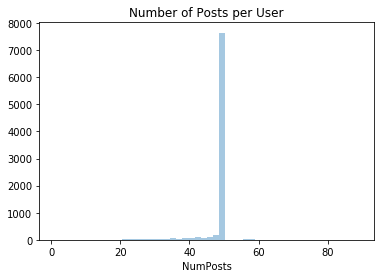

In [129]:
#Number of Posts per User
df["NumPosts"] = df["posts"].apply(lambda x: len(x.split("|||")))

sns.distplot(df["NumPosts"], kde=False).set_title("Number of Posts per User");

In [130]:
#Split to posts
def extract(posts, new_posts):
    for post in posts[1].split("|||"):
        new_posts.append((posts[0], post))

posts = []
df.apply(lambda x: extract(x, posts), axis=1)
print("Number of users", len(df), "Number of posts", len(posts))

df = pd.DataFrame(posts, columns=["type", "posts"])

Number of users 8675 Number of posts 422845


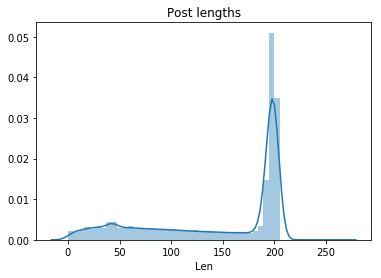

In [131]:
df["Len"] = df["posts"].apply(len)
sns.distplot(df["Len"]).set_title("Post lengths");

In [132]:
#Preprocess Text
df = preprocess_text(df) 

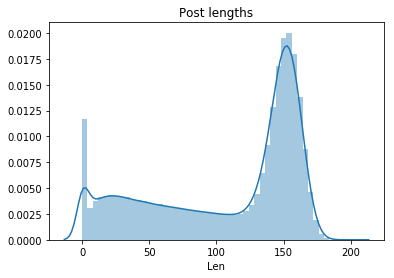

In [133]:
df["Len"] = df["posts"].apply(len)
sns.distplot(df["Len"]).set_title("Post lengths");

In [136]:
#Remove posts with less than X words
min_words = 15
df["nw"] = df["posts"].apply(lambda x: len(re.findall(r'\w+', x)))
df = df[df["nw"] >= min_words]

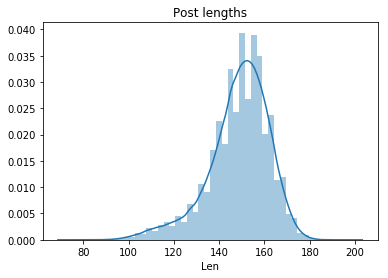

In [137]:
df["Len"] = df["posts"].apply(len)
sns.distplot(df["Len"]).set_title("Post lengths");

In [138]:
#Remove short posts
print("Number of posts", len(df)) 
df.drop(["nw", "Len"],axis=1, inplace=True)
print("Number of posts", len(df)) 

Number of posts 248868
Number of posts 248868


## BOW Model

In [114]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from nltk.stem.snowball import SnowballStemmer

In [115]:
#Stem
stemmer = SnowballStemmer("english")

df["posts"] = df["posts"].apply(lambda x: " ".join(stemmer.stem(p) for p in x.split(" ")))

In [116]:
vect = CountVectorizer(stop_words='english') #min_df=2 
#vect = TfidfVectorizer(stop_words='english')
X =  vect.fit_transform(df["posts"]) 

le = LabelEncoder()
y = le.fit_transform(df["type"])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=42)

In [117]:
# #Most frequent Words
# #vect.vocabulary_.get(u'infj')
# sum_words = X.sum(axis=0)
# words_freq = [(word, sum_words[0, idx]) for word, idx in vect.vocabulary_.items()]
# words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
# wfdf = pd.DataFrame(words_freq)
# f = sns.distplot(wfdf[1]).set_title("Distribution of Number of occurances of words");

## Random Estimation

In [118]:
def cat_accuracy(yp_test, y_test, le):
    ype = np.array(list("".join(le.inverse_transform(yp_test))))
    ye = np.array(list("".join(le.inverse_transform(y_test))))
    return (ype == ye).mean()

def predict_random_guess(priors, lp):
    return np.random.choice(priors.index, lp, p=priors.values)

num_iter = 100
mc16 = np.zeros(num_iter)
mc4 = np.zeros(num_iter)

warnings.filterwarnings(action='ignore', category=DeprecationWarning)
for i in range(100):
    mc16[i] = np.mean(le.transform(predict_random_guess(priors, len(y_test))) == y_test)
    mc4[i] = cat_accuracy(le.transform(predict_random_guess(priors, len(y_test))), y_test, le)


print ("Random guessing 16 Types:", mc16.mean(), mc16.std())
print ("Random Guessing 4 Categories:", mc4.mean(), mc4.std())

Random guessing 16 Types: 0.12912513255567337 0.00173736752073472
Random Guessing 4 Categories: 0.6087155355249205 0.0010733011673391228


## NaiveBayes

In [119]:
clf = MultinomialNB(alpha=0.4, fit_prior=False)
clf.fit(X_train, y_train)

yp_train = clf.predict(X_train)
print("Train accuracy:", np.mean(yp_train == y_train))

yp_test = clf.predict(X_test)
print("Test accuracy:", np.mean(yp_test == y_test))

print("Categorical accuracy:", cat_accuracy(yp_test, y_test, le))

Train accuracy: 0.37653251795424686
Test accuracy: 0.2104984093319194
Categorical accuracy: 0.6659000530222694


In [275]:
# #Most Frequent words across personality Types
# feature_names = vect.get_feature_names()
# maxC = 250

# print (len(feature_names))
# mfw = set()
# for i, cls in enumerate(clf.feature_log_prob_):
#     print("PT:", le.inverse_transform(i), len(cls))
#     tdf = pd.DataFrame({"word":feature_names, "freq":cls})
#     tdf.sort_values("freq", ascending=False, inplace=True)
#     tdf= tdf.reset_index()
#     if len(mfw) == 0:
#         mfw = set(tdf[0:maxC]["word"])
#     else:
#         mfw = mfw.intersection(set(tdf[0:maxC]["word"]))
#     print(tdf[0:][["freq", "word"]].head(20))
# print(len(mfw))

In [276]:
# for i, cls in enumerate(clf.feature_log_prob_):
#     print("PT:", le.inverse_transform(i), len(cls))
#     tdf = pd.DataFrame({"word":feature_names, "freq":cls})
#     tdf.sort_values("freq", ascending=False, inplace=True)
#     tdf= tdf.reset_index()
#     tdf = tdf[tdf.word.apply(lambda x: not(x in mfw))]
#     print(tdf[0:][["freq", "word"]].head(20))

In [27]:
clf = SGDClassifier(alpha=0.01)
clf.fit(X_train, y_train)

yp_train = clf.predict(X_train)
print("Train accuracy:", np.mean(yp_train == y_train))

yp_test = clf.predict(X_test)
print("Test accuracy:", np.mean(yp_test == y_test))

print("Categorical accuracy:", cat_accuracy(yp_test, y_test, le))

/home/brunno/anaconda2/envs/ana41py35/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


Train accuracy: 0.9200717304982707
Test accuracy: 0.32142857142857145
Categorical accuracy: 0.7350230414746544


## Plot Predictions

In [120]:
dft = pd.DataFrame(le.inverse_transform(yp_test),columns=["pred"])
dft["cnt"] =  1
dft["same"] = (yp_test == y_test)
dft["same"] = dft["same"].astype(int)

groupsn = dft.groupby("pred").sum()
groupsn.sort_values("cnt", ascending=False, inplace=True)

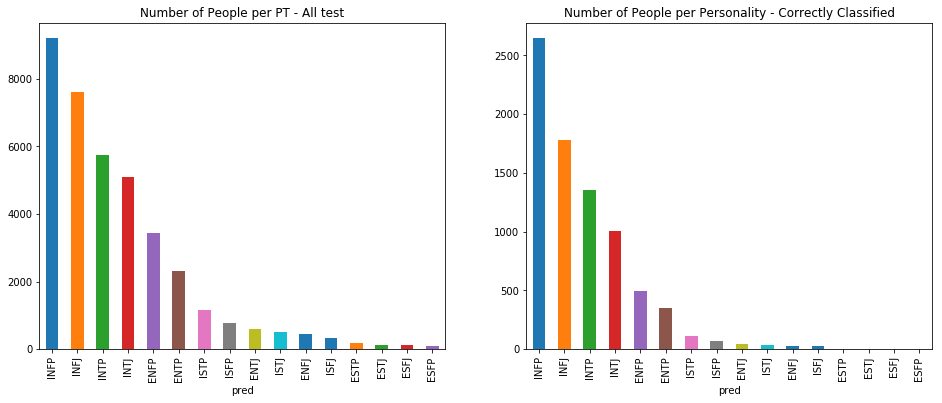

In [121]:
f, ax = plt.subplots(1,2,figsize=(2*PW,PH))
groupsn["cnt"].plot(kind="bar", title="Number of People per PT - All test", ax=ax[0]);
groupsn["same"].plot(kind="bar", title="Number of People per Personality - Correctly Classified", ax=ax[1]);
#groups["posts"].plot(kind="bar", title="Number of People per Personality type", ax=ax[2]);

## Count Analysis

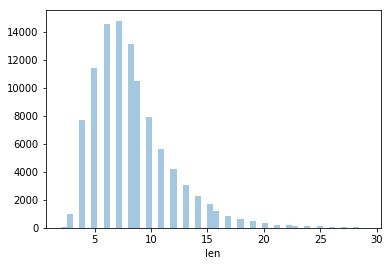

In [122]:
wdf = pd.DataFrame( vect.get_feature_names(),columns=["word"])
wdf["len"] = wdf.word.apply(len)
sns.distplot(wdf["len"], kde=False);